In [ ]:
import torch
import time
import numpy as np
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_file_path = '/content/twitter_training.csv'


train_data = pd.read_csv(train_file_path, header=None)




In [ ]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
train_data.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
train_data.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
train_data.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [ ]:
train_data.dropna(subset=['Tweet Content'], inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   Entity         73996 non-null  object
 2   Sentiment      73996 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
sentiment_counts = train_data['Sentiment'].value_counts()

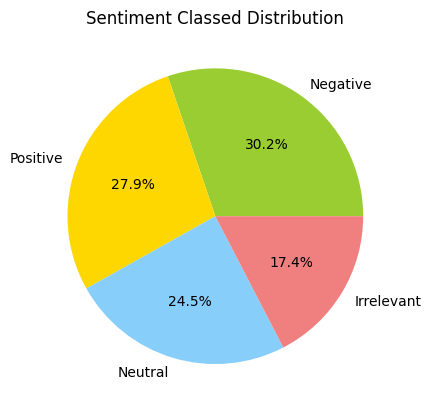

In [ ]:
# Create a pie chart
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors = colors)

# Add a title
plt.title('Sentiment Classed Distribution')

# Display the chart;
plt.show()

In [ ]:
train_data.Sentiment.value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

In [ ]:
train_data['text_lens']=train_data['Tweet Content'].apply(lambda x: len(x))


In [ ]:
import seaborn as sns

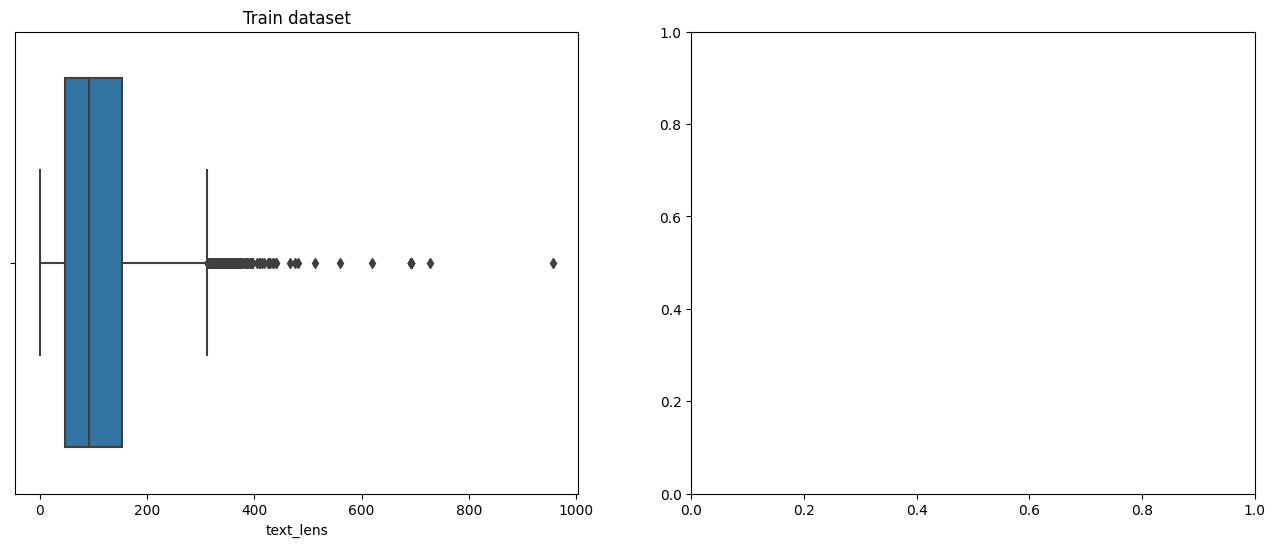

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(16,6))

sns.boxplot(data=train_data,x='text_lens',ax=ax[0])

ax[0].set_title("Train dataset")

plt.show()

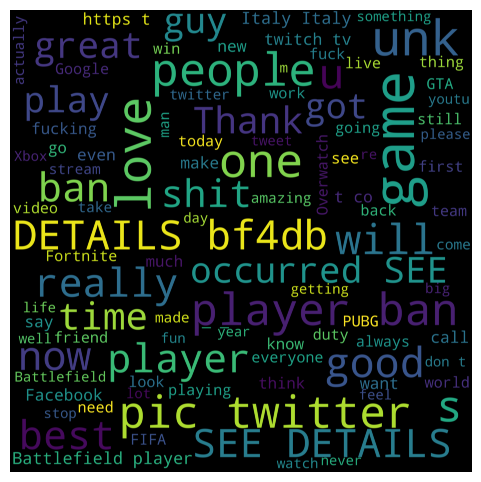

In [ ]:
from wordcloud import WordCloud
word_cloud_text = ''.join(train_data[train_data["Sentiment"]=="Irrelevant"]["Tweet Content"])
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()